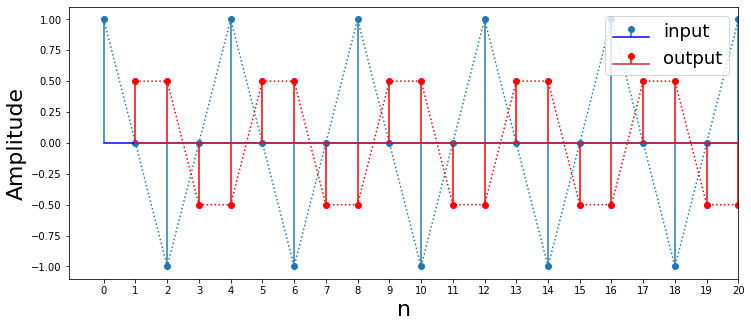

In [1]:
from numpy import arange, cos, pi
from scipy import signal
import matplotlib.pyplot as plt

Ns=30 # length of input sequence
n= arange(Ns) # sample index
x = cos(arange(Ns)*pi/2.)
y= signal.lfilter([1/2.,1/2.],1,x)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(12,5)

ax.stem(n,x,label='input', basefmt='b-')
ax.plot(n,x,':')
ax.stem(n[1:],y[:-1],markerfmt='ro', linefmt='r-', label='output')
ax.plot(n[1:],y[:-1], 'r:')
ax.set_ylim(ymin=-1.1,ymax=1.1)
ax.set_xlabel("n",fontsize=22)
ax.legend(loc=0,fontsize=18)
ax.set_xticks(n)
ax.set_xlim(xmin=-1.1,xmax=20)
ax.set_ylabel("Amplitude",fontsize=22)

plt.show()

In [ ]:
from numpy.dual import fft
from numpy import sinc, log10

wc = pi/4
M=20
N = 512 # DFT size
n = arange(-M,M)
win = signal.windows.hamming(len(n))
h = wc/pi * sinc(wc*(n)/pi)*win # see definition of np.sinc()

w,Hh = signal.freqz(h,1,whole=True, worN=N) # get entire frequency domain
wx = fft.fftfreq(len(w)) # shift to center for plotting

fig,axs = plt.subplots(3,1)
fig.set_size_inches((8,8))
plt.subplots_adjust(hspace=0.3)

ax=axs[0]
ax.stem(n+M,h,basefmt='b-')
ax.set_xlabel("$n$",fontsize=24)
ax.set_ylabel("$h_n$",fontsize=24)
ax=axs[1]
ax.plot(w-pi,abs(fft.fftshift(Hh)))
ax.axis(xmax=pi/2,xmin=-pi/2)
ax.vlines([-wc,wc],0,1.2,color='g',lw=2., linestyle='--',)

ax.hlines(1,-pi,pi,color='g',lw=2., linestyle='--',)
ax.set_xlabel(r"$\omega$",fontsize=22)
ax.set_ylabel(r"$|H(\omega)| $",fontsize=22)

ax=axs[2]
ax.plot(w-pi,20*log10(abs(fft.fftshift(Hh))))
ax.axis(ymin=-80,xmax=pi/2,xmin=-pi/2)
ax.vlines([-wc,wc],10,-80,color='g', lw=2., linestyle='--',)
ax.hlines(0,-pi,pi,color='g', lw=2., linestyle='--',)
ax.set_xlabel(r"$\omega$",fontsize=22)
ax.set_ylabel(r"$20\log_{10}|H(\omega)| $",fontsize=18)

plt.show()
